Agenda !
* Understanding Naive Bayes algorithm
* Working of Bayes Algorithms.
* Merits and Demerits of using Naive Bayes
* Naive Bayes Algorithm Applications
* Types of Bayes Algorithm
* How to improve the power of Naive Bayes Model
* Naive Bayes Model in Python




**Understanding Naive Bayes Algorithm**
Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c).


**Working of Bayes Algorithms.**
Naive Bayes classifier calculates the probability of an event in the following
steps:

Step 1: Calculate the prior probability for given class labels

Step 2: Find Likelihood probability with each attribute for each class

Step 3: Put these value in Bayes Formula and calculate posterior probability.

Step 4: See which class has a higher probability, given the input belongs to the higher probability class.


# Merits and Demerits of using Naive Bayes

Merits:

It is easy and fast to predict class of test data set.
It also perform well in multi class prediction.
When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
It perform well in case of categorical input variables compared to numerical variable(s).
For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

Demerits

If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.


Naive Bayes Algorithm Applications

Real time Prediction: Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.

Multi class Prediction: This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.

Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)

Recommendation System: Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not


There are three types of Naive Bayes model under the scikit-learn library:

Gaussian : It is used in classification and it assumes that features follow a normal distribution.

Multinomial : It is used for discrete counts. For example, let’s say, we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

Bernoulli : The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.


**How to improve the power of Naive Bayes Model**

If continuous features do not have normal distribution, we should use transformation or different methods to convert it in normal distribution.
If test data set has zero frequency issue, apply smoothing techniques “Laplace Correction” to predict the class of test data set. Remove correlated features, as the highly correlated features are voted twice in the model and it can lead to over inflating importance. Naive Bayes classifiers has limited options for parameter tuning like alpha=1 for smoothing, fit_prior=[True|False] to learn class prior probabilities or not and some other options (check documentation). It is recommended to focus on your pre-processing of data and the feature selection.
You might think to apply some classifier combination technique like ensembling, bagging and boosting but these methods would not help. Actually, “ensembling, boosting, bagging” won’t help since their purpose is to reduce variance. Naive Bayes has no variance to minimize


In [ ]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
print("libaries imported")

libaries imported


In [ ]:
dataset = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
dataset.head()
print("DAtaset loaded")

DAtaset loaded


In [ ]:
X = dataset.iloc[:, 5].values
y = dataset.iloc[:, 8].values

In [ ]:
dataset.drop(columns=['BMI Category'], inplace=True)

print(dataset.head())


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level Blood Pressure  \
0                 6                       42             6         126/83   
1                 6                       60             8         125/80   
2                 6                       60             8         125/80   
3                 4                       30             8         140/90   
4                 4                       30             8         140/90   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200            NaN  
1          75        10000            NaN  
2       

In [ ]:
#select the 5 and 6th columns
X = dataset.iloc[:, 5].values
y = dataset.iloc[:, 7].values

In [ ]:
print(X)
print(y)

[6 6 6 4 4 4 6 7 7 7 6 7 6 6 6 6 5 6 5 7 7 7 7 7 7 7 7 7 7 7 5 5 8 6 7 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 6 7 6 6 7 6 6 7 6 6 6 6 6 6 8 6 6 6 6 6 6 6
 6 6 6 6 6 6 4 4 7 7 8 8 8 8 8 8 8 8 8 7 8 8 8 8 8 8 8 8 8 5 8 5 6 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 8 5
 7 9 9 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 7 8 8 8 8 8 8 8 8 6 8 8 8 8 8 8 6
 6 7 6 7 6 7 6 6 6 6 6 6 6 6 6 6 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 6 7 6
 6 6 7 6 7 6 7 6 7 6 7 6 7 6 6 7 6 6 7 6 6 7 6 7 6 7 6 6 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 6 7 6 6 6 6 6 6 6 6 6 9 9 6 9 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 9 9 9 9 7 6 6 6 7 7 7 7 7 7 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9]
[6 8 8 8 8 8 7 6 6 6 8 6 8 8 8 8 7 8 7 6 6 6 6 6 6 6 6 6 6 6 7 7 4 8 6 8 8
 6 6 6 6 6 6 6 6 6 6 6 6 6 3 3 8 6 8 8 6 8 8 6 8 8 8 8 8 8 6 8 6 6 8 8 8 8
 8 8 8 8 8 8 8 8 5 5 5 4 4 4 4 4 4 4 5 5 4 4 4 4 4 4 4 4 4 7 4 7 6 4 4 5 4
 5 4 5 4 4 4 4 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print("tranformed data")
print(X)

tranformed data
[[-1.09828011]
 [-1.09828011]
 [-1.09828011]
 [-2.77142374]
 [-2.77142374]
 [-2.77142374]
 [-1.09828011]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-1.09828011]
 [-0.26170829]
 [-1.09828011]
 [-1.09828011]
 [-1.09828011]
 [-1.09828011]
 [-1.93485192]
 [-1.09828011]
 [-1.93485192]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-1.93485192]
 [-1.93485192]
 [ 0.57486352]
 [-1.09828011]
 [-0.26170829]
 [-1.09828011]
 [-1.09828011]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [-0.26170829]
 [ 0.57486352]
 [ 0.57486352]
 [-1.09828011]
 [-0.26170829]
 [-1.09828011]
 [-1.09828011]
 [-0.26170829]
 [-1.09828011]
 [-1.09828011]
 [-0.26170829]
 [-1.09828011]
 [-1.09828011]
 [-1.09828011]
 [-1.09828011]
 [-1.09828011]
 [-1.0982

In [ ]:
#split the dat ainto training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)
print(model)

GaussianNB()


In [ ]:
predicted = model.predict(X_test)
print(predicted)

[5 8 6 5 5 5 8 6 8 8 3 5 8 8 3 5 8 6 3 3 5 6 8 8 3 8 8 6 8 8 3 5 8 8 5 6 5
 5 8 6 8 8 6 3 6 8 3 3 7 8 6 6 6 5 6 8 5 6 5 5 6 6 8 8 6 8 8 8 8 8 5 6 6 3
 3 8 8 8 5 8 5 6 7 3 8 8 6 3 5 6 3 3 8 6]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
metrics.confusion_matrix(predicted, y_test)

array([[15,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  6, 12,  1,  0,  0],
       [ 0,  6,  3, 12,  2,  0],
       [ 0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  2, 12, 21]])

In [ ]:
model_score = model.score(X_test, y_test)
model_score

0.6382978723404256

In [ ]:
y_predictProb = model.predict_proba(X_test)
print(y_predictProb)

[[1.44686319e-006 3.30396144e-001 6.54634714e-001 1.45767023e-002
  3.65051938e-004 2.59406112e-005]
 [7.49207984e-056 3.56111023e-003 6.02915594e-012 1.75681991e-002
  3.93102728e-001 5.85767962e-001]
 [1.00689824e-024 3.17526553e-001 3.43908666e-003 5.48790859e-001
  8.24363488e-002 4.78071526e-002]
 [1.44686319e-006 3.30396144e-001 6.54634714e-001 1.45767023e-002
  3.65051938e-004 2.59406112e-005]
 [1.44686319e-006 3.30396144e-001 6.54634714e-001 1.45767023e-002
  3.65051938e-004 2.59406112e-005]
 [1.44686319e-006 3.30396144e-001 6.54634714e-001 1.45767023e-002
  3.65051938e-004 2.59406112e-005]
 [7.49207984e-056 3.56111023e-003 6.02915594e-012 1.75681991e-002
  3.93102728e-001 5.85767962e-001]
 [1.00689824e-024 3.17526553e-001 3.43908666e-003 5.48790859e-001
  8.24363488e-002 4.78071526e-002]
 [7.49207984e-056 3.56111023e-003 6.02915594e-012 1.75681991e-002
  3.93102728e-001 5.85767962e-001]
 [7.49207984e-056 3.56111023e-003 6.02915594e-012 1.75681991e-002
  3.93102728e-001 5.85767

In [ ]:
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(y_predictProb.shape[1]))

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_predictProb.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_predictProb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print AUC for each class
for i in range(y_predictProb.shape[1]):
    print(f"AUC for class {i}: {roc_auc[i]}")

AUC for class 0: nan
AUC for class 1: nan
AUC for class 2: nan
AUC for class 3: 0.025316455696202556
AUC for class 4: 0.35365853658536583
AUC for class 5: 0.2683544303797468


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


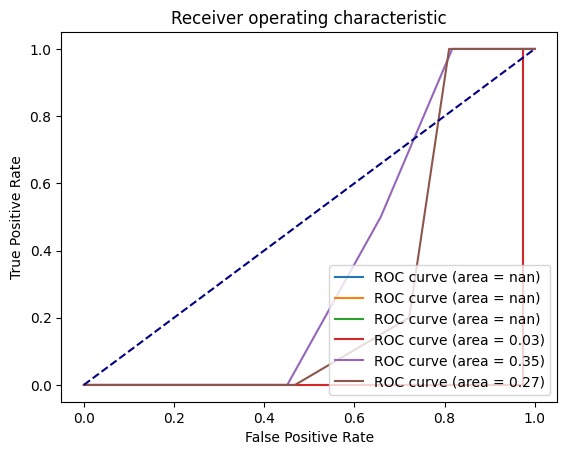

In [ ]:
import matplotlib.pyplot as plt

# Plot ROC Curve for each class
for i in range(y_predictProb.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

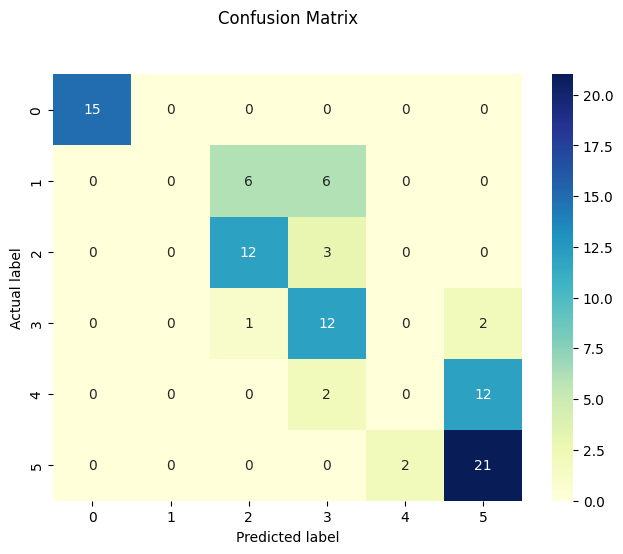

In [ ]:
# prompt: create a cofusion

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
cm = confusion_matrix(y_test, predicted)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" , fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
